# Изучение закономерностей, определяющих успешность игр
## Содержание: <a id='content'></a> 
1. [Изучение общей информации](#information)  
2. [Подготовка данных](#preparation)
3. [Исследовательский анализ данных](#eda)
4. [Составление портрета пользователя каждого региона](#portrait)
5. [Проверка гипотез](#hypotheses)
6. [Вывод](#conclusion)

## 1. Изучение общей информации <a class="anchor" id="information"></a>

In [1]:
# импортируем нужные нам библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [49]:
#отключаем предупреждения
warnings.filterwarnings('ignore')
#устанавлиаем формат отображения численных значений
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# сохраним исходную таблицу в переменную
games = pd.read_csv('/datasets/games.csv')

In [4]:
# просмотр первых строк таблицы
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
# общая информация
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**При первом просмотре таблицы можно обнаружить следующие недоработки:**
- пропущенные значения в нескольких столбцах;
- неверный тип данных в столбцах year_of_release и user_score (в первом случае это следствие пропусков);
- названия столбцов следует привести к нижнему регистру.

### 2. Подготовка данных<a class="anchor" id="preparation"></a>
[Назад к оглавлению](#content)

Предобработку данных начнем с приведения к нижнему регистру названий столбцов, чтобы в дальнейшем быстро и безошибочно к ним обращаться:

In [6]:
games.columns = games.columns.str.lower()

In [7]:
# проверяем
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


Неверный тип данных имеют следующие столбцы:
- user_score - из object в float;
- year_of_release - из float нужно перевести в int.

Изучим подробнее столбец с оценкой пользователей, чтобы понять причину возникновения неверного формата данных:

In [8]:
# выведем уникальные значения столбца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# и количество значений
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
0.5       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Здесь почти 2.5 тысячи строк в значении рейтинга указана аббревиатура **tbd**. Она расшифровывается как **to be determined**, что означает отсутствие рейтинга на данный момент. В нашей случае мы можем приравнять это к NaN, для этого используем метод `to_numeric` и в параметре `errors` укажем 'coerce'.

In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Неверный формат в столбце `year_of_release` связан с пропусками, поскольку NaN относится к float64. Прежде чем перевести его в целочисленный тип, нам нужно обработать эти значения.  
Здесь пропуски относятся к механизму **MAR**: они случайные, поскольку напрямую зависят от значений другого столбца - названия игры. Заполнить их средним или медианным значением мы не можем, однако, учитывая что они составляют менее 2%, искажений данных не последует, если мы не будем их учитывать. Поэтому для преобразования заполним пропуски нулями. 

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype('int')

Пропуски в столбце `rating` также подчиняются этому механизму. Чтобы такие игры оставались в данных при анализе рейтинга, заполним их значением "no info":

In [12]:
games['rating'] = games['rating'].fillna('no info')

Пропущенные значения есть и в названиях игр:

In [13]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,nan,nan,no info
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,nan,nan,no info


Учитывая их количество и давний год выпуска, мы можем удалить их.

In [14]:
games.drop([659, 14244], inplace=True)

Более половины значений пропущено в столбце с оценкой критиков и почти треть в оценке пользователей - такое количество пропусков мы не можем оставить без обработки. Заполнение будем производить уникальным значением 0, чтобы в дальнейшем их анализ не показывал отклонения:

In [15]:
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(0)

In [16]:
# проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Также для дальнейшей обработки необходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец:

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [18]:
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1540,Army Men 3D,PS,1999,Action,1.10,0.14,0.00,0.04,0.00,0.00,no info,1.28
3227,NBA ShootOut '97,PS,1997,Sports,0.35,0.24,0.00,0.04,0.00,0.00,no info,0.63
13524,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.00,0.00,E,0.04
2837,Major League Baseball 2K7,X360,2007,Sports,0.67,0.00,0.00,0.06,79.00,7.10,E,0.73
2762,Resident Evil: Revelations,PS3,2013,Action,0.14,0.29,0.22,0.09,74.00,7.20,M,0.74


Таким образом мы подготовили данные для последующего анализа: привели названия столбцов к нижнему регистру, заполнили пропуски количественных данных (столбцы с оценкой игр) и добавили новый столбец, в котором посчитайли суммарные продажи во всех регионах. В исходных данных некоторые категориальные пропущенные значения относились к случайным (MAR) - их было решено заполнить уникальным значением, чтобы в дальнейшем видеть о них информацию.

### 3. Исследовательский анализ данных<a class="anchor" id="eda"></a>
[Назад к оглавлению](#content)

На данном этапе мы посмотрим сколько игр выпускалось в разные годы и установим все ли периоды важны для дальнейшего анализа. Узнаем, как менялись продажи по платформам и установим характерный период их появления и исчезания. Выделим актуальный период и на его основании изучим прибыльность и перспективность платформ, а также выявим зависимость продаж от оценок критиков и пользователей и рассмотрим продажи относительно жанров.

Начнем исследование с анализа **количества выпускаемых игр в разные годы**. Сгруппируем таблицу по этому показателю и на ее основе построим график:

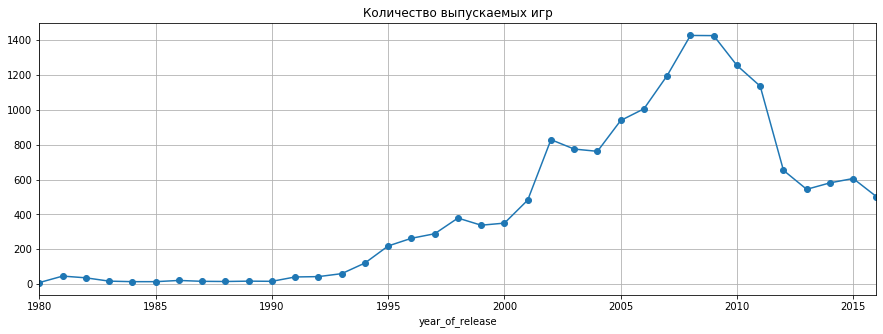

In [19]:
(games
 .groupby('year_of_release')['name']
 .count()
 .plot(style='o-', figsize=(15, 5), xlim=(1980, 2016), grid=True, title='Количество выпускаемых игр')
)
plt.show()

До середины 90-х объем выпускаемых игр был крайне низким. После этого наблюдается уверенный подъем, его пик приходится на 2008 год - тогда вышло более 1400 игр для всех консолей. Начиная с 2010 количество вновь пошло на убыль, вероятно это связано с развитием мобильных технологий. В 2013 году, когда на рынке появились новые приставки XBox One и PS4, объем выпусков вновь стал возрастать.   
Исходя из этого графика, нам не имеет смысла рассматривать игры периода 1980-1995 годов. Сохраним в отдельную переменную таблицу, в которой исключим указанный период:

In [20]:
games_actual = games.query('year_of_release >= 1995')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15958 entries, 0 to 16714
Data columns (total 12 columns):
name               15958 non-null object
platform           15958 non-null object
year_of_release    15958 non-null int64
genre              15958 non-null object
na_sales           15958 non-null float64
eu_sales           15958 non-null float64
jp_sales           15958 non-null float64
other_sales        15958 non-null float64
critic_score       15958 non-null float64
user_score         15958 non-null float64
rating             15958 non-null object
total_sales        15958 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Посмотрим, как менялись **продажи по платформам**. Для этого выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

In [21]:
platform_sales = games_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2    1,233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       239.79
N64      218.01
GC       196.73
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: total_sales, dtype: float64

Второе поколение приставок PlayStation на данный момент является лидером по количеству проданных игр.  
Рассмотрим **топ-10 платформ**. Сохраним их в отдельную переменную.

In [22]:
top10_platforms = platform_sales.reset_index().head(10)['platform'].unique()
top10_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Для каждой платформы будем строить распределение в цикле:

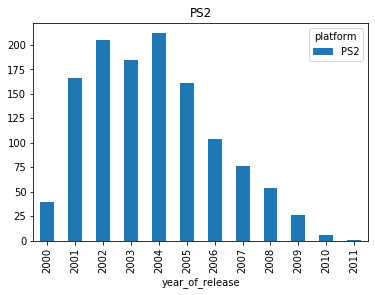

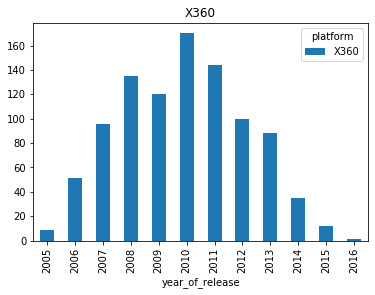

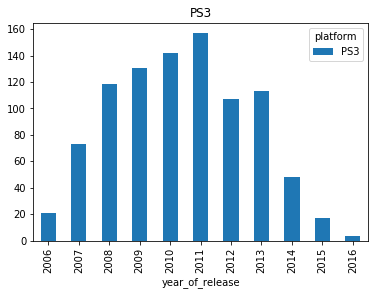

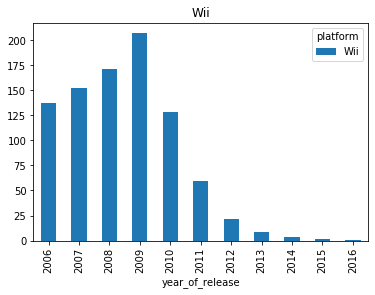

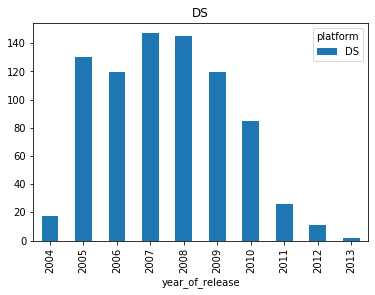

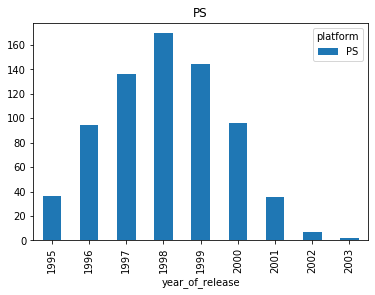

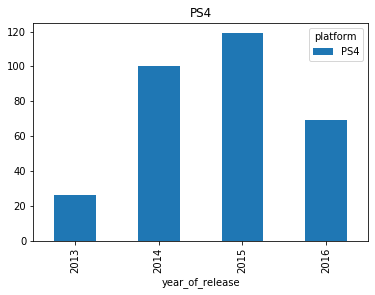

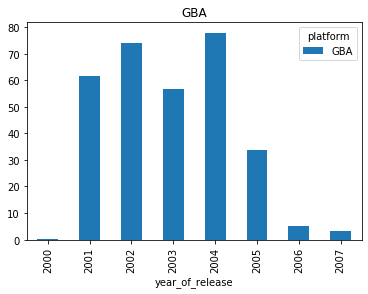

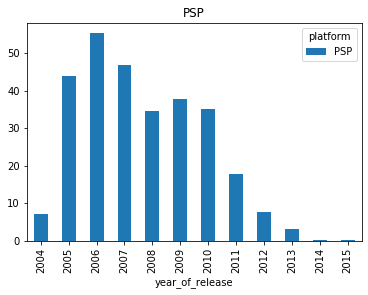

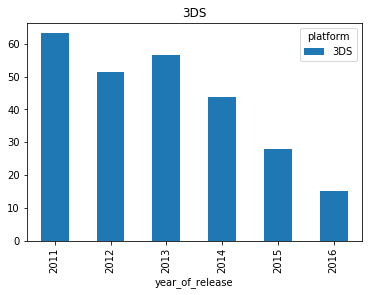

In [23]:
for platform in top10_platforms:
    (games_actual
     .loc[games_actual['platform'] == platform]
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='bar', figsize=(6,4))
    )
    plt.title(platform)
    plt.show()    

Как видно по гистограммам, распределение продаж похоже на нормальное - они возрастают, достигая определенного пика, затем практически линейно снижаются до тех пор, пока данная платформа не прекратит выпуск новых игр. В среднем такой срок продолжительности жизни платформы около **10 лет**.

Теперь нам нужно указать **актуальный период**, на основании которого мы можем сделать прогноз на 2017 год. Для этого можем сразу исключить из исследуемых данных те платформы, которые на момент 2016 года перестали выпускать игры:

In [24]:
games_actual.groupby('platform')['year_of_release'].max().sort_values(ascending=False)

platform
XOne    2016
PS4     2016
X360    2016
WiiU    2016
Wii     2016
3DS     2016
PC      2016
PS3     2016
PSV     2016
PSP     2015
DS      2013
PS2     2011
XB      2008
DC      2008
GC      2007
GBA     2007
PS      2003
N64     2002
GB      2001
WS      2001
SAT     1999
SNES    1999
PCFX    1996
NG      1996
TG16    1995
3DO     1995
Name: year_of_release, dtype: int64

Актуальных на сегодняшний день платформ 9, сохраним их названия в отдельную переменную:

In [25]:
platforms_actual = (games_actual
                    .groupby('platform')['year_of_release'].max()
                    .sort_values(ascending=False)
                    .reset_index()
                    .head(9)
                    .platform
                    .unique()
                   )
platforms_actual

array(['XOne', 'PS4', 'X360', 'WiiU', 'Wii', '3DS', 'PC', 'PS3', 'PSV'],
      dtype=object)

Учитывая эти данные, а также приведенный ранее показатель "выживаемости" консолей 10 лет, обновим переменную `games_actual`, оставив там только игры актуальных на данный момент платформ. Также для составления прогноза на будущий год возьмем временной отрезок, берущий начало с года появления двух, пожалуй, самых известных и динамично развивающихся приставок - PS4 и Xbox One - 2013. Далее будет рассматриваться именно этот срез исходных данных.

In [26]:
games_actual = games_actual.query('platform in @platforms_actual and year_of_release >= 2013')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 16 to 16714
Data columns (total 12 columns):
name               2158 non-null object
platform           2158 non-null object
year_of_release    2158 non-null int64
genre              2158 non-null object
na_sales           2158 non-null float64
eu_sales           2158 non-null float64
jp_sales           2158 non-null float64
other_sales        2158 non-null float64
critic_score       2158 non-null float64
user_score         2158 non-null float64
rating             2158 non-null object
total_sales        2158 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 219.2+ KB


Далее узнаем, какие платформы **лидируют по продажам, растут или падают** и выберем несколько потенциально прибыльных платформ. Для этого построим график зависимости продаж от года выпуска:

In [27]:
# группируем данные по году выпуска для каждой платформы
games_actual_grouped = (games_actual
                        .pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum'))

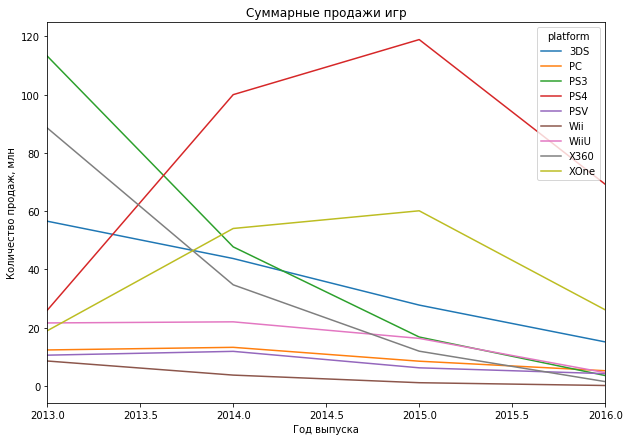

In [28]:
games_actual_grouped.plot(figsize=(10, 7))
plt.title('Суммарные продажи игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж, млн')
plt.show()

В тройку лидеров по продажам игр входят PS4, XBox One и 3DS. При этом мы не можем считать, что для первых двух продажи на сегодняшний день падают, посколько данные за 2016 год могут быть не полными. Эти две приставки, на наш взгляд, являются наиболее персективными.    
Их предшественники - PS3 и XBox 360 - в начале исследуемого периода также были лидерами, однако теперь закономерно теряют свою актуальность, и продажи игр для них за последние годы стремительно падают.  
Самые низкие продажи у приставки Nintendo Wii - несмотря на недавнюю популярность, последние несколько лет они стремятся к нулю, что не дает нам возможности считать ее потенциально прибыльной.  
Относительно небольшие продажи, однако более стабильные, имеют игры, выпусаемые для PS Vita и PC - на эти консоли мы до сих пор можем ориентироваться.

Построим **диаграммы размаха продаж** для каждой платформы:

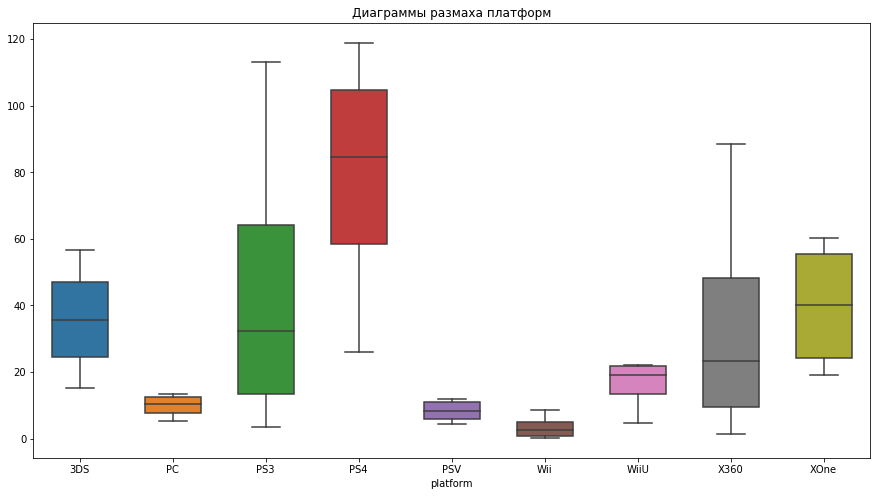

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=games_actual_grouped, width=0.6)
plt.title('Диаграммы размаха платформ')
plt.show()

Самые высокие показатели мы можем наблюдать у приставки PS4, даже при неполных данных за последний год она имеет самое высокое медианное знчение, а по размаху уступает только своему предшественнику. При сравнении с основным конкурентом от Microsoft разница кажется весьма значительной - его медиана практически в 2 раза меньше, а темпы увеличения продаж не такие быстрые, исходя из размаха.Тем не менее, нынешнее поколение XBox уже становится популярнее "прородителя".  
Nintendo 3DS здесь также показывает хорошие результаты по продажам, ее диаграмма размаха лишь немногим уступает Xbox, скорее всего это связано с большой популярностью на своей родине, но гораздо меньшей по всему остальному миру.  
Портативные консоли - PS Vita и Nintendo Wii U имеют куда более скромные, но при этом стабильные продажи - такую тенденцию мы могли наблюдать и на графике выше. Размах здесь также относительно небольшой - около 10 млн игр для первой и 20 млн для второй платформы.  
Продажи игр для ПК также не могут похвастаться высоким объемом продаж, видимо, чаще компьютеры используют для работы и учебы, чем в игровых целях, помимо этого могут сказываться постоянно возрастающие системные требования.

Посмотрим, как влияют на продажи внутри одной платформы **отзывы пользователей и критиков**.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для этого напишем функцию, которая на вход будет принимать название платформы.  
Для рассмотрения выберем самую популярную из них на сегодняшний день - PS4.

In [50]:
def correlation(platform):
    sales_score = (games_actual
                   .query('platform == @platform and user_score > 0 and critic_score > 0')[['total_sales', 
                                                                                            'critic_score', 
                                                                                            'user_score']]) 
    pd.plotting.scatter_matrix(sales_score, figsize=(9, 9))
    return sales_score.corr()

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


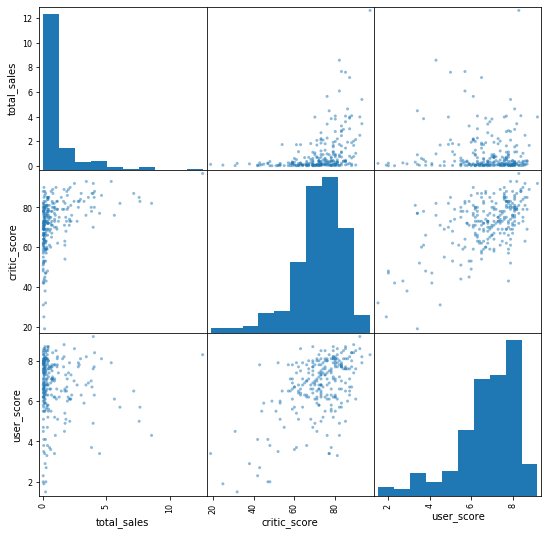

In [31]:
correlation('PS4')

Игроманы чаще всего прислушиваются к мнению критиков - количество продаж увеличивается при более высоких оценках. При оценках пользователей ниже среднего встречаются несколько игр с очень неплохими продажами - от 4 до 10 млн. В целом мы можем говорить о зависимости продаж от отзывов.    
Приведенные коэффициенты подтверждают матрицу рассеивания: продажи больше зависят от оценок критиков, чем от пользователей. При этом даже в первом случае она менее 50%, значит оценки не являются основополагающим фактором количества проданных игр.

Применим данную функцию для нескольких других платформ и сопоставим результаты:

,total_sales,critic_score,user_score
total_sales,1.00,0.41,-0.09
critic_score,0.41,1.00,0.47
user_score,-0.09,0.47,1.00


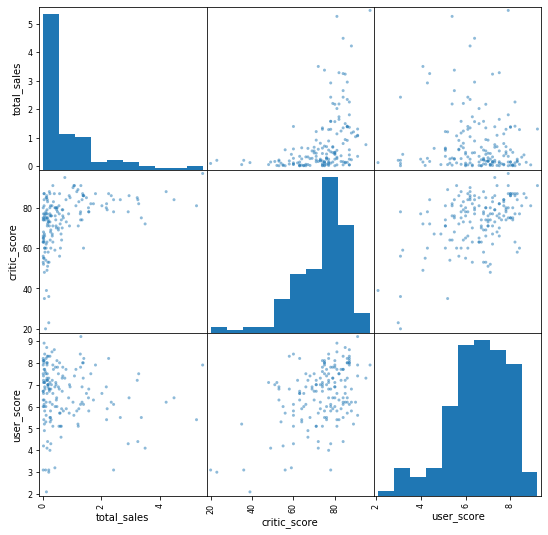

In [32]:
correlation('XOne')

,total_sales,critic_score,user_score
total_sales,1.00,0.19,-0.11
critic_score,0.19,1.00,0.43
user_score,-0.11,0.43,1.00


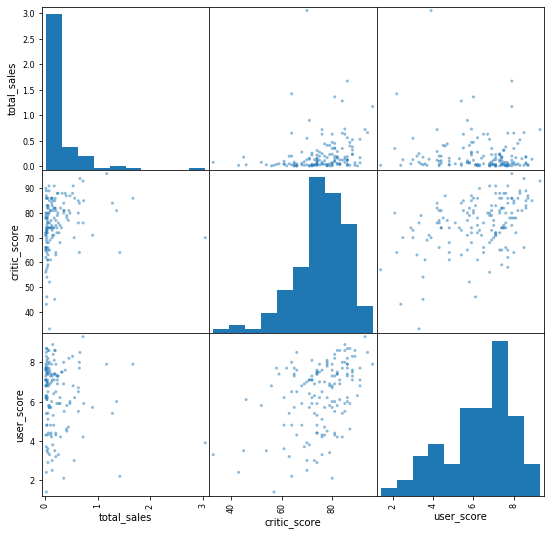

In [33]:
correlation('PC')

Как видно, эти консоли имеют практически такую же закономерность.  

Наконец, посмотрим на общее **распределение игр по жанрам** и узнаем какие из них наиболее прибыльные:

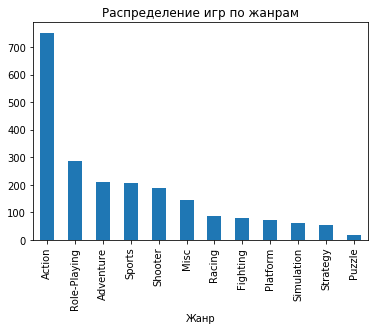

In [34]:
games_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.show()

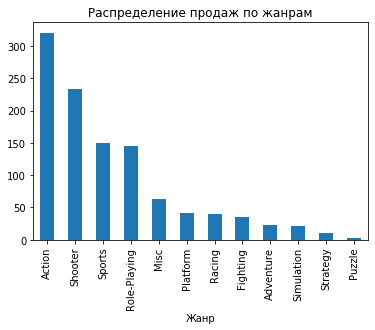

In [35]:
games_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.show()

Здесь лидером являются игры в жанре экшен - более 300 млн. копий более 700 разных игр были распроданы за время наших наблюдений. Ролевые игры вторые по количеству в нашем распределении и также имеют довольно высокие продажи - почти 150 млн. экземпляров, однако располагаясь при этом лишь на 4 месте и немногим уступая спортивным играм. Последние же по своему объему аналогичным образом занимают четвертое место. "Стрелялки" при относительно небольшом разнообразии игр пользуются высокой популярностью - они вторые по количеству проданных копий. Примечательны игры в приключенческом жанре - по производству они получают "бронзу" в то время как их продажи весьма скромные - менее 40 млн.  
Далее в целом оба распределения соответствуют друг другу с небольшими переменами мест.

Таким образом мы выяснили, что наибольшее развитие игровой индустрии пришлось с 1995 по 2008 год, после этого периода он начал снижаться до тех пор, пока на рынок не вышли новые приставки XBox One и PS4. В средней срок жизни каждой консоли составляет примерно 10 лет - за это время продажи растут, достигая пика, затем активно снижаются вплоть до момента прекращения выпуска. На сегодняшний день только 9 платформ являются актуальными. Наиболее перспективными из них мы определили PS4 и XBox One, также к этой категории мы можем отнести PS Vita и PC за счет стабильности продаж. Что касаемо оценок, здесь на продажи больше влияет мнение экспертов о той или иной игре - корреляция между этими показателями заметно больше, нежели между продажами и оценкой пользователей. Такая закономерность характерна для нескольких проверенных платформ. Среди жанров самым востребованным является экшен, спортивные игры и шутеры имеют довольно высокие продажи, при этом их производство за последние годы относительно небольшое. Ролевые игры также занимают лидирующие позиции по обоим показателям.

### 4. Составление портрета пользователя каждого региона<a class="anchor" id="portrait"></a>
[Назад к оглавлению](#content)

На данном этапе мы определим какие самые популярные платформы в США, Европе и Японии и опишем различия в долях продаж. Также для этих трех регионов выявим самые популярные жанры, посмотрев на их распределения и установим влияет ли рейтинг игры на продажи в них.

Начнем описание с определения количества проданных игр по регионам. Пропишем функцию, которая на вход будет принимать исследуемый регион и выводить топ-5 платформ по количеству продаж вместе с их долями:

In [36]:
# выделим колонки с продажами по регионам в отдельную переменную
columns = ['na_sales', 'eu_sales', 'jp_sales']

In [37]:
def top5(country):
    top = (games_actual
            .groupby('platform')
            .agg({column:'sum'})
            .sort_values(by=column, ascending=False)
            .head()
            )
    top['part'] = top[column] / top[column].sum() # добавляем новый столбец, указывающий долю продаж
    return top

,na_sales,part
platform,,
PS4,108.74,0.28
XOne,93.12,0.24
X360,81.66,0.21
PS3,63.50,0.16
3DS,38.20,0.10


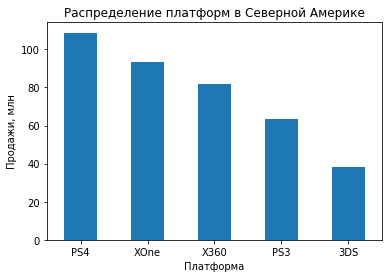

,eu_sales,part
platform,,
PS4,141.09,0.42
PS3,67.81,0.20
XOne,51.59,0.15
X360,42.52,0.13
3DS,30.96,0.09


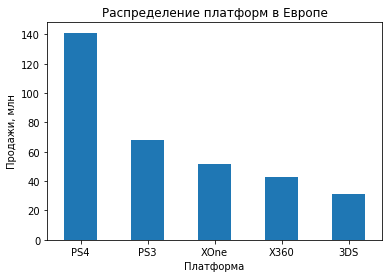

,jp_sales,part
platform,,
3DS,67.81,0.50
PS3,23.35,0.17
PSV,18.59,0.14
PS4,15.96,0.12
WiiU,10.88,0.08


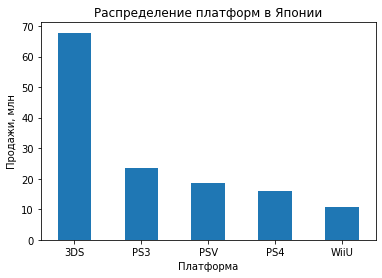

In [38]:
# применяем функцию в цикле
for column in columns:
    display(top5(column))
    top5(column)[column].plot(kind='bar')
    if column == 'na_sales':
        plt.title('Распределение платформ в Северной Америке')
    if column == 'eu_sales':
        plt.title('Распределение платформ в Европе')
    if column == 'jp_sales':
        plt.title('Распределение платформ в Японии')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн')
    plt.xticks(rotation=0)
    plt.show()

В Северной Америке приставки от Sony и Microsoft занимают первые позиции - PS4 и XOne соответственно, а консоли прошлых поколений здесь поменялись местами - X360 оказался популярнее. В евпропейских странах же консоли PlayStation обоих поколений оказались популярнее - XBox One здесь появляется лишь на третьей позиции. В обоих регионах пятерку замыкает Nintendo 3DS.  
В Японии же картина заметно отличается - 3DS является безоговорочным лидером, что подтверждает наше предположение о том, что консоль оказалась в списке лидеров благодаря внутренним продажам. Более того, для Японии характерная особенность в том, что все самые популярные приставки произведены именно в этой стране.  
Доли продаж во всех регионах также отличаются: в США лидер занимает менее 30% рынка, в Европе он же чуть больше 40%, а в Японии ровно половину продаж составляет 3DS. Если сравнивать разницу между современными Xbox и PS, то если в Штатах она составляет только 9%, европейский пользователи предпочитают лидера практически в 3 раза чаще - разница между долями около 30%. 

Теперь узнаем какие жанры пользуются наибольшей популярности в регионах и как влияет рейтинг конкретной игры на ее продажи.  
Для этого вновь прибегнем к функции: на вход она будет принимать интересующий нас параметр - столбец с жанром или рейтингом - и строить распределения по убыванию первых 5-и значений.

In [39]:
def plot_constructor(group):
    (games_actual
        .groupby(group)[column].sum()
        .sort_values(ascending=False)
        .head()
        .plot(kind='bar')
    )
    plt.xticks(rotation=0)

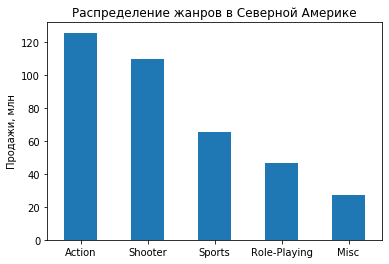

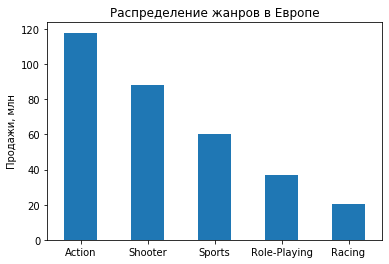

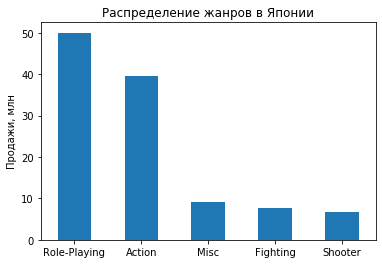

In [40]:
# распределение для жанра
for column in columns:
    if column == 'na_sales':
        plt.title('Распределение жанров в Северной Америке')
    if column == 'eu_sales':
        plt.title('Распределение жанров в Европе')
    if column == 'jp_sales':
        plt.title('Распределение жанров в Японии')
    plot_constructor('genre')
    plt.xlabel('')
    plt.ylabel('Продажи, млн')
    plt.show()

Европа и Северная Америка имеют практически одинаковые вкусы - отличия только в последнем столбце, европейцы больше предпочитают гонки, в то время как американцы - ролевые игры.  Куда более значимые различия у Японии - здесь ролевые игры наоборот занимают первую позицию, опережая даже игры в жанре экшен. Вероятнее всего это связано с тем, что японцы выпускают их для своего внутреннего рынка уже долгие годы, тем самым заработав определенную репутацию среди пользователей. К тому же, не стоит забывать про культурные различия, которые так же сказываются и на игровой индустрии.

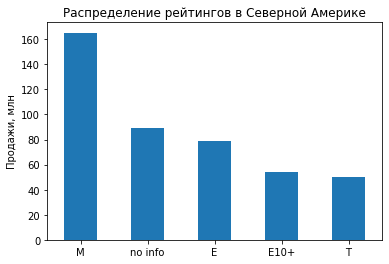

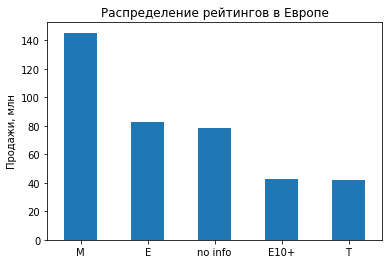

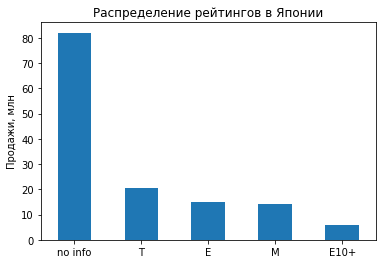

In [41]:
# распределение для рейтинга
for column in columns:
    if column == 'na_sales':
        plt.title('Распределение рейтингов в Северной Америке')
    if column == 'eu_sales':
        plt.title('Распределение рейтингов в Европе')
    if column == 'jp_sales':
        plt.title('Распределение рейтингов в Японии')
    plot_constructor('rating')
    plt.xlabel('')
    plt.ylabel('Продажи, млн')
    plt.show()

Рейтинг игры также оказывает влияние на ее продажи. В Европе и Америке распределение практически одинаковое - самые популярные имеют рейтинг M (для взрослых), далее следует Е (для всех), Т (подростки) и Е10+ (для всех старше 10 лет), большой пласт занимают игры, для которых рейтинг обозначен не был. Для Японии же опять видны существенные различия: так как организация ESRB, которая предоставляет рейтинг для игр в первую очередь в США и Канаде, игры без обозначенного ей рейтинга превышают по продажам все остальные вместе взятые - их более 80 млн, далее следуют подростковые и для всех, почти такой же объем имеют игры для взрослых, а замыкают пятерку игры для детей старше 10 лет.

### 5. Проверка гипотез<a class="anchor" id="hypotheses"></a>
[Назад к оглавлению](#content)

На заключительном этапе работы мы проверим 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные. 

Для сравнения двух выборок, нам нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  
В первом тесте нулевая гипотеза будет звучать следующим образом: **"среднее рассматриваемой генеральной совокупности пользовательских рейтингов платфоры Xbox One равно среднему генеральной совокупности пользовательских рейтингов PC**. Следовательно, альтернативная гипотеза будет утверждать, что эти две генеральные совокупности между собой не равны.  
Для проверки нулевой гипотезы проведем t-test. Уровень значимости обозначим 5%. Если полученное значение p-value окажется меньше, чем alpha - мы отвергаем нулевую гипотезу. Если больше - отвергнуть мы ее не можем.

In [42]:
xone = games_actual.query('platform == "XOne"')
pc = games_actual.query('platform == "PC"')

Сравним дисперсии этих двух выборок:

In [43]:
print('Дисперсия для Xbox One:', np.var(xone['user_score']))
print('Дисперсия для PC:', np.var(pc['user_score']))

Дисперсия для Xbox One: 9.644061367994883
Дисперсия для PC: 8.273014753226393


Они примерно одинаковые, поэтому при проведении t-теста Стьюдента будем использовать параметр equal_var=True (по умолчанию), чтобы дисперсия каждой выборки была оценена по объединённому датасету из двух выборок.

In [44]:
np.var(pc['user_score'])

8.273014753226393

In [45]:
alpha = 0.05
results = st.ttest_ind(xone['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)
results.pvalue
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24875948537089854
Не получилось отвергнуть нулевую гипотезу


По результатам проверки нулевой гипотезы p-значение превысило заданный нами 5%-ный порог, а значит у нас **недостаточно оснований для опровержения гипотезы о равенстве двух генеральных совокупностей**.

Второй тест будет проводиться по тому же принципу. Нулевая гипотеза здесь: **"среднее рассматриваемой генеральной совокупности пользовательских рейтингов жанра Action равно среднему генеральной совокупности пользовательских рейтингов жанра Sports"**. Альтернаятивная гипотеза - эти генеральные совокупности не равны. Тип теста и уровень значимости будет аналогичен предыдущему.

In [46]:
action = games_actual.query('genre == "Action"')
sports = games_actual.query('genre == "Sports"')

Так же сравним две дисперсии:

In [47]:
print('Дисперсия для Action:', np.var(action['user_score']))
print('Дисперсия для Sports:', np.var(sports['user_score']))

Дисперсия для Action: 12.60137838105478
Дисперсия для Sports: 7.377860345784025


Значения двух дисперсий здесь отличаются, поэтому, в отличие от предыдущего теста, укажем параметр equal_var=False

In [48]:
alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-значение:', results.pvalue)
results.pvalue
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.035713531235256946
Отвергаем нулевую гипотезу


Мы получили значение p-value меньше указанного нами уровня статистической значимости, а значит мы **не можем принять нулевую гипотезу о равенстве двух генеральных совокупностей**.

### 6. Вывод<a class="anchor" id="conclusion"></a>
[Назад к оглавлению](#content)

Таким образом мы провели анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанров и платформ и постарались выявить определяющие успешность игры закономерности, что в дальнейшем позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Для этого были взяты данные игр, начиная с 1980 года в количестве более 16000 наименований. Решение аналитической задачи мы начали с изучения данных и их подготовки: приведению к нужному типу и заполнению пропусков. Пропуски, которые имеют случайный механизм формирования (MAR) - год выпуска игры и ее рейтинг, - мы заменили уникальными значениями, чтобы не потерять при дальнейшем исследовании. Оценки пользователей и критиков было решено так же заполнить уникальными значениями, однако с противоположной целью - чтобы при изучении учитывались только реальные показатели.  
После этого мы провели исследовательский анализ: его целью было узнать сколько игр выпускалось в разные годы и установить актуальный период, чтобы выделить наиболее прибыльные и перспективные платформы, а также выявить зависимость продаж от оценок критиков и пользователей и рассмотрим продажи относительно жанров. 
До середины 90-х объем выпускаемых игр был крайне низким. Затем наблюдается уверенный подъем, его пик приходится на 2008 год - тогда вышло более 1400 игр для всех консолей. Начиная с 2010 количество вновь пошло на убыль, вероятно это связано с развитием мобильных технологий. В 2013 году, когда на рынке появились новын приставки XBox One и PS4, объем выпусков вновь стал возрастать. Среди всех приставок лидером по количеству продаж игр является PS2. Диаграммы распределения продаж показали результаты, похожие на нормальные - они возрастают, достигая определенного пика, затем практически линейно снижаются до тех пор, пока данная платформа не прекратит выпуск новых игр. В среднем такой срок продолжительности жизни платформы равен 10 годам.  
Для дальнейших исследований мы выбрали временной отрезок начиная с 2013 года, так как именно тогда появились две наиболее актуальные на сегодняшний день платформы:  отрезок и учитывали те платформы, которые не прекратили выпускать игры по сей день.  
В тройку лидеров по продажам игр входят PS4, XBox One и 3DS. Первые две являются наиболее персективными, их предшественники - PS3 и XBox 360 - закономерно теряют свою актуальность, и продажи игр для них за последние годы стремительно падают.
Самые низкие продажи у приставки Nintendo Wii - несмотря на недавнюю популярность, последние несколько лет они стремятся к нулю, что не дает нам возможности считать ее потенциально прибыльной. Относительно небольшие продажи, однако более стабильные, имеют игры, выпусаемые для PS Vita и PC - на эти консоли мы до сих пор можем ориентироваться.  
Мнение критиков оказывает большее влияние, нежели рейтинг пользователей - количество продаж увеличивается при более высоких оценках. При оценках пользователей ниже среднего встречаются несколько игр с очень неплохими продажами - от 4 до 10 млн. В целом мы можем говорить о зависимости продаж от отзывов. Коэффициент корреляции в первом случае (для PS4) составляет 0.41, при втором он близок к 0.  
Лидерами являются игры в жанре экшен - более 300 млн. копий более 700 разных игр были распроданы за время наблюдений. Ролевые игры вторые по количеству в нашем распределении и также имеют довольно высокие продажи - почти 150 млн. экземпляров, однако располагаясь при этом лишь на 4 месте и немногим уступая спортивным играм. Последние же по своему объему также занимают четвертое место. "Стрелялки" при относительно небольшом разнообразии игр пользуются высокой популярностью - они вторые по количеству проданных копий. Примечательны игры в приключенческом жанре - по производству они получают "бронзу" в то время как их продажи весьма скромные - менее 40 млн.  
Лидерами по популярности в США и Европе являются PS4, но в первом случае их доля на рынке составляет менее 30%, а во втором более 40%. В Японии картина заметно отличается - 3DS является безоговорочным лидером, что подтверждает наше предположение о том, что консоль оказалась в списке лидеров благодаря внутренним продажам. Более того, для Японии характерная особенность в том, что все самые популярные приставки произведены именно в этой стране.  
Европа и Северная Америка имеют практически одинаковые вкусы относительно жанра игры - в тройку здесь вошли экшены, шутеры и спортивные игры. Куда более значимые различия у Японии - здесь ролевые игры наоборот занимают первую позицию, опережая даже игры в жанре экшен. Вероятнее всего это связано с тем, что японцы выпускают их для своего внутреннего рынка уже долгие годы, тем самым заработав определенную репутацию среди пользователей, а также сказываются культурные различия.  
Рейтинг игры также оказывает влияние на ее продажи. В Европе и Америке распределение практически одинаковое - самые популярные имеют рейтинг M (для взрослых), далее следует Е (для всех), Е10+ (для всех старше 10 лет) и Т (подростки). Большое количество игр рейтинга не имеют. Для Японии же опять видны существенные различия: игр без рейтинга здесь абсолютное большинство, далее следуют подростковые и для всех, для взрослых располагаются на 4-й позиции и замыкают 10+.  
На финальном этапе мы проверили две важные гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
1. Средние пользовательские рейтинги жанров Action и Sports разные. 

После выявления p-уровня значимости для первой гипготезы мы не смогли ее отвергнуть - данный показатель составлял больше заданного нами порогового в 5%. Отличия же в жанрах имеют место быть, и исходя из показателя p-значения нулевая гипотеза о равенстве средних двух генеральных совокупностей нами была отвергнута.